# <font color='blue'>**LABORATORIO 1. Comparación de clasificadores tradicionales usando SIFT/ORB +  KMeans + MLP**

 <font color='red'>Nombre Completo:__________

<font color='red'>#ID UAO:__________



<font color='blue'>**(15%) Parte 1. Preprocesando un dataset.**

Usaremos un dataset disponible en scikit learn (para el cual ya encontrarás la linea de código en la próxima celda).  Puedes encontrar más información acerca del dataset en esta pagina: http://vis-www.cs.umass.edu/lfw/

Realiza un código que le permita cumplir con lo siguiente:

* Estudia la manera como obtener del dataset los arreglos pertenecientes a las imagenes y los de las etiquetas.

* Divide el conjunto de imagenes en imagenes de entrenamiento (80%) e imagenes de validación (20%). Lee  y aplica a tus datos la función ***train_test_split*** de ***sklearn.model_selection***. Imprime en pantalla los tamaños obtenidos de ***X_train***, ***y_train***, ***X_test*** y ***y_test***.

* Un buen pre-procesamiento puede mejorar su clasificador. Por lo cual debes normalizar la imagen. Lee y aplica a tus datos la función ***MinMaxScaler*** de ***sklearn.preprocessing***

* Utiliza pyplot para mostrar 9 imagenes aleatorias del conjunto de entrenamiento, asignales como título el nombre de su respectiva etiqueta.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import cv2
from sklearn.cluster import KMeans



#Coloca aqui el resto de librerías que usaras en este Laboratorio

In [2]:
lfw_people = fetch_lfw_people( min_faces_per_person=70, resize=0.4)

In [3]:
#Coloca aqui el código que permite tener los arreglos de labels, imagenes o datos y categorias

# Obtener las etiquetas
labels = lfw_people.target
# Obtener las imágenes
images = lfw_people.images
# Obtener las categorías
categories = lfw_people.target_names

In [4]:
# Coloca aquí el código que permite dividir tu conjunto de datos en entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(
    lfw_people.images, lfw_people.target, test_size=0.2, random_state=42
)

In [5]:
# Coloca aquí el código que permite normalizar tus imagenes.

x_train_plane = X_train.reshape(X_train.shape[0], -1)
x_test_plane = X_test.reshape(X_test.shape[0], -1)

# Crear el objeto MinMaxScaler
scaler = MinMaxScaler()

X_train_norm = scaler.fit_transform(x_train_plane)
X_test_norm =  scaler.transform(x_test_plane)

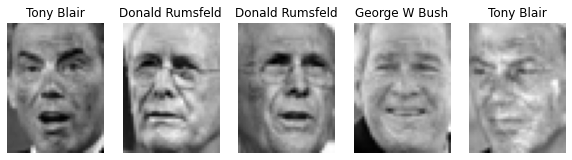

In [6]:
# Coloca aquí el código que te permite visualizar un conjunto aleatorio de tus imagenes de entrenamiento.
# Número de imágenes a mostrar
num_images = 5

# Seleccionar un conjunto aleatorio de imágenes
random_indices = [0, 1, 2 ,3 ,4]

# Crear una figura para mostrar las imágenes
fig, axes = plt.subplots(1, num_images, figsize=(10, 10))

for i, image_index in enumerate(random_indices):
    # Obtener la imagen correspondiente
    image = X_train_norm[image_index].reshape(50, 37)
    
    # Mostrar la imagen
    axes[i].imshow(image, cmap= "gray")
    axes[i].set_title(categories[y_train[image_index]])
    axes[i].axis('off')

# Mostrar la figura
plt.show()

<font color='white'>**(20%) Parte 2. Detectores/Descriptores**

Extrae las caracteristicas que van a alimentar su ANN (Artificial Neural Network). Realiza 2 funciones diferentes que te permitan obtener 2 tipos de caracterisiticas: SIFT y ORB.

Cree un diccionario  que le permita tener los descriptores de las imagenes por categoría. (Tanto para las imagenes de entrenamiento, como para las de prueba).

Tenga en cuenta el siguiente diagrama de bloques como base para el diseño de su arquitectura:

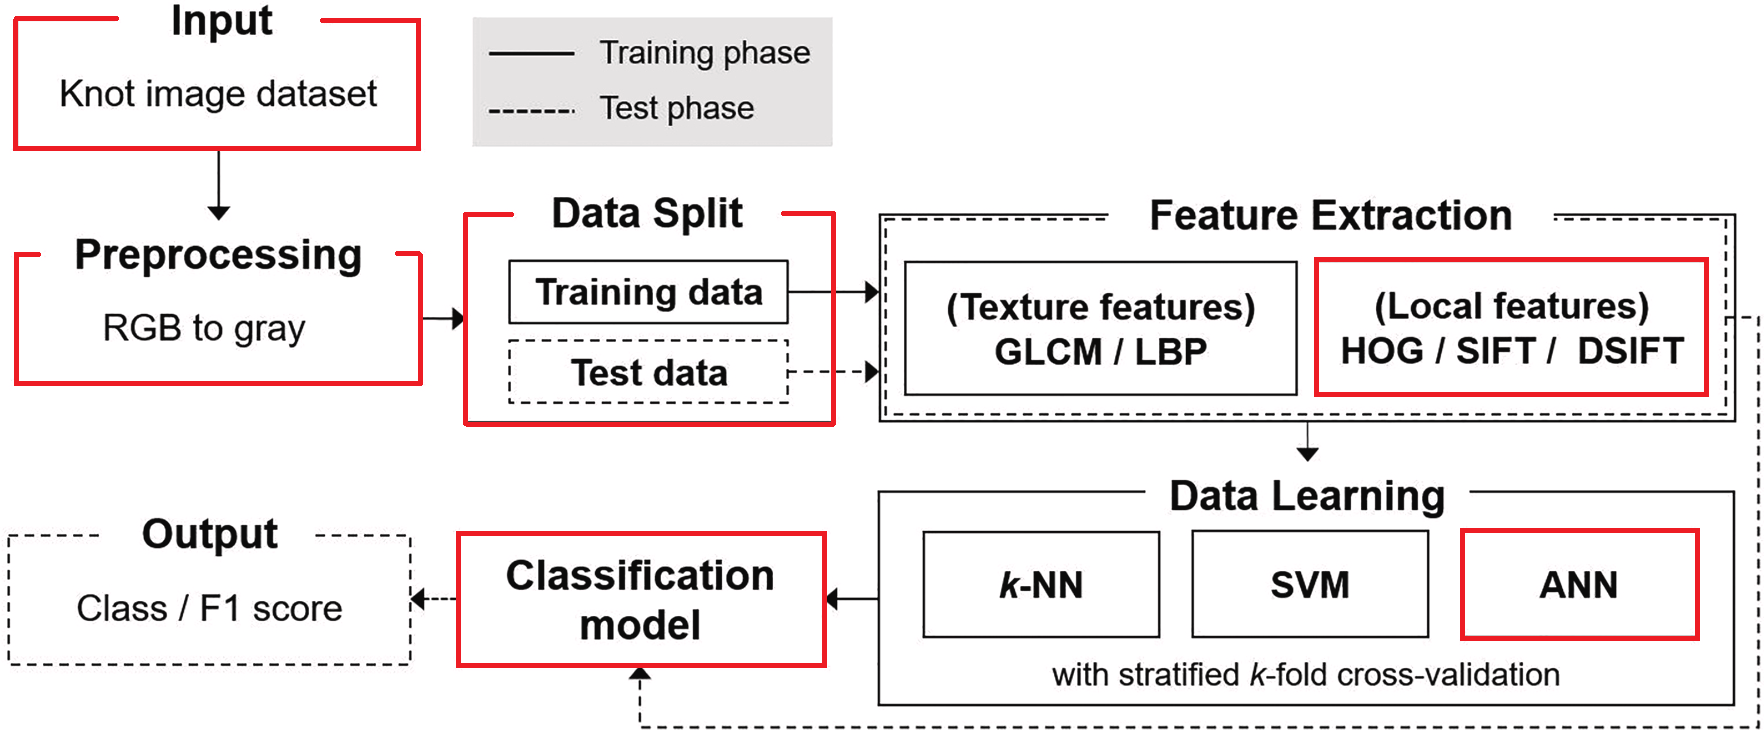


In [7]:

def extract_sift_features(images, labels):
    image_features = []
    sift_vectors = {}
    counter = 0;
    for i in images:
        # Crear el objeto SIFT
        sift = cv2.xfeatures2d.SIFT_create()
        image = (i * 255).astype(np.uint8)
        keypoints, descriptors = sift.detectAndCompute(image, None)
        image_features.extend(descriptors)
        sift_vectors[labels[counter]] = descriptors
        counter += 1

    return [image_features, sift_vectors]

# Función para extraer características ORB
def extract_orb_features(images, labels):
    image_features = []
    orb_vectors = {}
    counter = 0;
    for image in images:
        # Convertir la imagen a escala de grises
        image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        orb = cv2.ORB_create()
        keypoints, descriptors = orb.detectAndCompute(image_color, None)
        image_features.append(descriptors)
        orb_vectors[labels[i]] = descriptors
        counter += 1
        
    return [image_features, orb_vectors]


# Crear los diccionarios de características para las imágenes de entrenamiento y de prueba
train_feature_dict_sift, train_vector_dict_sift = extract_sift_features(X_train, y_train)
test_feature_dict_sift, test_vector_dict_sift = extract_sift_features(X_test, y_test)


train_feature_dict_orb, train_vector_dict_orb = extract_orb_features(X_train, y_train)
test_feature_dict_orb, test_vector_dict_orb = extract_orb_features(X_test, y_test)

In [10]:
print(len(train_feature_dict_sift))
print(len(train_vector_dict_sift))

24354
7


<font color='white'>**(15%) Parte 3. Usando K-Means y el concepto de BoVW para adecuar los descriptores como entrada valida de una ANN**

Nota que el numero de desciptores puede cambiar entre imagen e imagen. Como sabrás las redes neuronales clásicas necesitan de una entrada fija, en otras palabras  un descriptor SIFT u ORB no servirían como entrada a una ANN porquesu tamaño puede variar.

La pregunta es ¿Cómo puedo hacer que el tamaño de los descriptores sea fijo?

Existe algo llamado Bag o Visual Words (BoVW) que permite cumplir con este objetivo. Por favor lee los siguientes documentos [aquí](https://medium.com/@aybukeyalcinerr/bag-of-visual-words-bovw-db9500331b2f) y [aquí](https://machinelearningknowledge.ai/image-classification-using-bag-of-visual-words-model/)

Responde las siguientes preguntas:

1. Entendiendo que la teoría proviene de NLP y se adecuó a imagenes, ¿Quienes o qué serían las "***words***" en el caso de imagenes?
R=/ los vectores de caracteristicas de las imagenes.

2. ¿Cúal es la función de ***K-Means*** dentro de la técnica ***BoVW***?
r=/ Se encarga de crear el libro de codigos o vocabulario visual.

3. Una vez se ha consturido el "vocabulario", se debe hacer uso de un análisis de frecuencias (histograma). ¿Para qué o por qué debe realizarse este tipo de análisis?
R=/ Se utiliza este analisis para poder clasificar y describir las imagenes basado en la frecuencia de ocurrencia de los keypoints y descriptores extraidos de la imagen

4. De manera suscinta explique en que consiste la técnica conocida como ***BoVW***?
R=/Es un metodo para clasificar imagenes por medio de la extraccion de caracteristicas, creacion de un diccionario visual, codificacion de caracteristicas, normalizacion y clasificacion.

<font color='white'>**(30%) Parte 3. Implementando el BoVW y entrenando una ANN**

1. Adecua y aplica el código que encontrarás [aquí](https://medium.com/@aybukeyalcinerr/bag-of-visual-words-bovw-db9500331b2f) y /o [aquí](https://machinelearningknowledge.ai/image-classification-using-bag-of-visual-words-model/) para obtener las entradas a tu ANN.

2. En las siguientes celdas encontrarás el código que permite compilar y entrenar una ANN (en este caso una Multi Layer Perceptron - MLP). Puedes hacer uso del mismo o modificar los parámetros a tu propio criterio.  Puedes cambiar la cantidad de neuronas, el numero de capas ocultas, la función de activación, el "*solver*", el numero de iteraciones entre otras. Puedes complementar tu comprensión del tema con [esta lectura] (https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/)

3. Interpreta el valor de Accuracy y la Matriz de confusión. Encontrarás tambien un código disponible para estas tareas. Sin embargo lo importante es que puedas generar al menos 3 conclusiones acerca de los resultados obtenidos.

In [11]:
def kmeans(k, descriptor_list):
    kmeans = KMeans(n_clusters = k, n_init=10)
    kmeans.fit(descriptor_list)
    visual_words = kmeans.cluster_centers_ 
    return visual_words

visual_words = kmeans(500, train_feature_dict_sift) 

In [13]:
print(len(visual_words))

500


In [16]:
# Crea un vector vacío para almacenar los histogramas
histograms = np.zeros((X_train.shape[0], 500))

# Recorre todas las imágenes
for i in range(X_train.shape[0]):
  # Calcula el histograma de la imagen actual
  histograma = np.histogram(train_feature_dict_sift[i], bins=len(visual_words), range=(0, visual_words.shape[0]))[0]
  # Normaliza el histograma
  histograma = histograma / np.sum(histograma)
  # Almacena el histograma
  histograms[i] = histograma

In [21]:
histograms_test = np.zeros((X_test.shape[0], 500))

# Recorre todas las imágenes
for i in range(X_test.shape[0]):
  # Calcula el histograma de la imagen actual
  histograma = np.histogram(test_feature_dict_sift[i], bins=len(visual_words), range=(0, visual_words.shape[0]))[0]
  # Normaliza el histograma
  histograma = histograma / np.sum(histograma)
  # Almacena el histograma
  histograms_test[i] = histograma

In [20]:
print(histograms.shape)
print(y_train.shape)

(1030, 500)
(1030,)


In [22]:
from sklearn.neural_network import MLPClassifier


In [23]:
#Código para compilar y entrenar una MLP
mlp = MLPClassifier(hidden_layer_sizes=(80,40), activation='relu', solver='adam', alpha=0.001, max_iter=500, verbose=True)
mlp.fit(histograms, y_train)
p = mlp.predict(histograms_test)


Iteration 1, loss = 1.90854993
Iteration 2, loss = 1.87235622
Iteration 3, loss = 1.84130427
Iteration 4, loss = 1.81636564
Iteration 5, loss = 1.79468911
Iteration 6, loss = 1.77397260
Iteration 7, loss = 1.75316438
Iteration 8, loss = 1.73510363
Iteration 9, loss = 1.71932989
Iteration 10, loss = 1.70956542
Iteration 11, loss = 1.70517093
Iteration 12, loss = 1.70243645
Iteration 13, loss = 1.70154763
Iteration 14, loss = 1.70048466
Iteration 15, loss = 1.69966069
Iteration 16, loss = 1.69914691
Iteration 17, loss = 1.69887559
Iteration 18, loss = 1.69856086
Iteration 19, loss = 1.69823269
Iteration 20, loss = 1.69788225
Iteration 21, loss = 1.69766380
Iteration 22, loss = 1.69740813
Iteration 23, loss = 1.69724498
Iteration 24, loss = 1.69681516
Iteration 25, loss = 1.69689497
Iteration 26, loss = 1.69622440
Iteration 27, loss = 1.69574547
Iteration 28, loss = 1.69564494
Iteration 29, loss = 1.69531741
Iteration 30, loss = 1.69515745
Iteration 31, loss = 1.69502682
Iteration 32, los

c:\Users\caoti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [28]:
#Métricas para evaluar la capacidad de aprendizaje que tuvo tu modelo.
acc = accuracy_score(y_test, p)
M = confusion_matrix(y_test, p)
print('El accuracy de nuestra red es de:', str(acc))
print(M)


El accuracy de nuestra red es de: 0.3023255813953488
[[ 1  3  1  3  1  0  2]
 [ 2  7  5 26  3  0  4]
 [ 0  3  2 11  1  1  4]
 [ 6 18  8 63  7  6 11]
 [ 2  2  1  9  1  0  4]
 [ 1  3  1  6  1  0  1]
 [ 0  1  2 16  1  3  4]]


In [26]:
#Mejorando la visualización de la matriz de confusión
from sklearn.metrics import confusion_matrix, accuracy_score
import  seaborn as sns

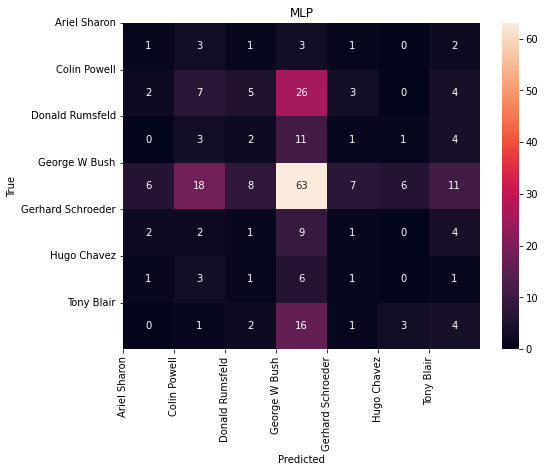

In [27]:
name="MLP"
plt.figure(figsize=(8,6))
plt.title(name)
sns.heatmap(M, annot=True, fmt='g')
plt.xticks(np.arange(M.shape[0]), ['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
 'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], rotation=90)
plt.yticks(np.arange(M.shape[0]), ['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
 'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], rotation=0)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("confusion_"+str(name)+".png")
plt.show()

Conclusiones:

* La mayoría de los valores diagonales (predicciones correctas) son altos, especialmente en las clases 3 (63) y 4 (9).
*  Los valores en las filas 1 y 2, y en las filas 6 y 7, fuera de la diagonal principal, son relativamente altos. Esto indica que el modelo tiene dificultades para distinguir entre estas clases.
* Este valor está muy por debajo del 50%, lo que indica que la red no está acertando la mayoría de las predicciones